# Day 10: Gender Style Transfer with GANs

## Assignment Objectives:
1. Load the pre-trained Generator model
2. Load Gender Vector for style transfer
3. Generate 10 variations of images from male to female using the gender vector

## Background:
This assignment demonstrates how to use pre-trained GAN models for gender style transfer. We'll use a pre-trained generator and apply gender vectors to transform facial features from male to female characteristics.

### Key Concepts:
- **GAN (Generative Adversarial Network)**: Deep learning architecture for generating realistic data
- **Generator**: Network that creates fake data from noise
- **Gender Vector**: Learned direction in latent space that represents gender transformation
- **Latent Space**: High-dimensional space where the generator operates

## Step 1: Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import warnings
warnings.filterwarnings('ignore')

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.20.0
GPU Available: []


## Step 2: Load Pre-trained Generator Model

We'll load one of the pre-trained generator models. These models were trained on the CelebA dataset and can generate realistic face images.

In [2]:
# List available generator models
generator_path = "Face-Generator-with-GAN-main/"
available_models = [f for f in os.listdir(generator_path) if f.startswith('generator_') and f.endswith('.h5')]
print("Available generator models:")
for model in available_models:
    print(f"  - {model}")

# Load the best performing generator (usually the one with highest epoch number)
if available_models:
    # Sort by epoch number and take the last one
    available_models.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
    selected_model = available_models[-1]
    print(f"\nLoading model: {selected_model}")
    
    generator = load_model(os.path.join(generator_path, selected_model))
    print("Generator model loaded successfully!")
    print(f"Input shape: {generator.input_shape}")
    print(f"Output shape: {generator.output_shape}")
else:
    print("No generator models found!")

Available generator models:
  - generator_100.h5
  - generator_200.h5
  - generator_300.h5
  - generator_400.h5
  - generator_500.h5
  - generator_600.h5
  - generator_700.h5

Loading model: generator_700.h5


Generator model loaded successfully!
Input shape: (None, 100)
Output shape: (None, 128, 128, 3)


## Step 3: Load Gender Vector

The gender vector represents the direction in latent space that corresponds to gender transformation. This vector was computed by analyzing the differences between male and female faces in the latent space.

In [3]:
# Load the gender vector
gender_vector_path = "Gender-Style-Transfer-main/gender_vec.npy"

if os.path.exists(gender_vector_path):
    gender_vector = np.load(gender_vector_path)
    print(f"Gender vector loaded successfully!")
    print(f"Gender vector shape: {gender_vector.shape}")
    print(f"Gender vector stats:")
    print(f"  - Mean: {np.mean(gender_vector):.4f}")
    print(f"  - Std: {np.std(gender_vector):.4f}")
    print(f"  - Min: {np.min(gender_vector):.4f}")
    print(f"  - Max: {np.max(gender_vector):.4f}")
else:
    print(f"Gender vector file not found at {gender_vector_path}")

Gender vector loaded successfully!
Gender vector shape: (1, 100)
Gender vector stats:
  - Mean: -0.0101
  - Std: 0.2173
  - Min: -0.4687
  - Max: 0.5326


## Step 4: Generate Base Images

First, let's generate some base images that we'll use for gender transformation.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


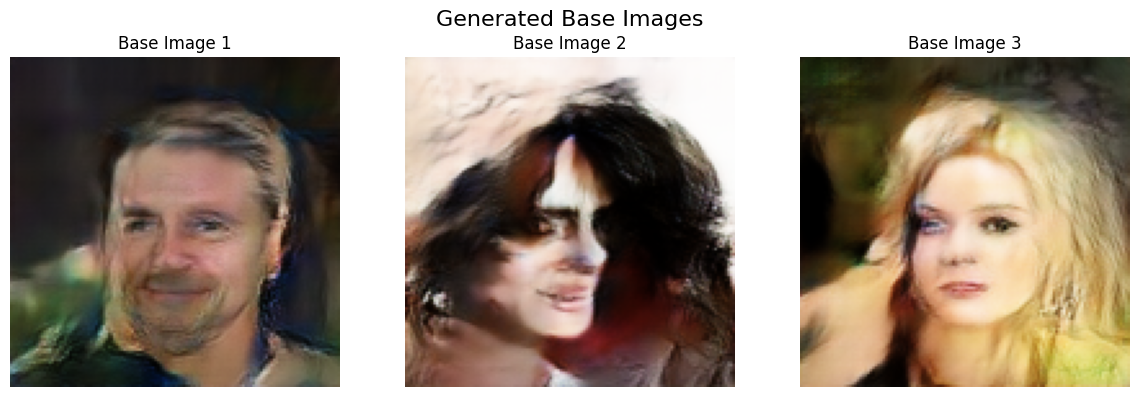

Generated 3 base images with shape: (3, 128, 128, 3)


In [4]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate random noise vectors
noise_dim = generator.input_shape[1]  # Usually 100
num_samples = 3  # Generate 3 base faces

# Generate random noise
base_noise = np.random.normal(0, 1, (num_samples, noise_dim))

# Generate base images
base_images = generator.predict(base_noise)

# Normalize images to [0, 1] range for display
base_images_display = (base_images + 1) / 2.0

# Display base images
fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
for i in range(num_samples):
    axes[i].imshow(base_images_display[i])
    axes[i].set_title(f'Base Image {i+1}')
    axes[i].axis('off')

plt.suptitle('Generated Base Images', fontsize=16)
plt.tight_layout()
plt.show()

print(f"Generated {num_samples} base images with shape: {base_images.shape}")

## Step 5: Generate 10 Variations from Male to Female

Now we'll create 10 variations for each base image, gradually transforming from male to female characteristics using the gender vector.

In [5]:
def generate_gender_variations(base_noise, gender_vector, num_variations=10, strength_range=(-3, 3)):
    """
    Generate gender variations by adding scaled gender vector to base noise.
    
    Args:
        base_noise: Base noise vector
        gender_vector: Gender transformation vector
        num_variations: Number of variations to generate
        strength_range: Range of scaling factors (negative=male, positive=female)
    
    Returns:
        variations: Generated image variations
        strengths: Scaling factors used
    """
    # Create scaling factors from male to female
    strengths = np.linspace(strength_range[0], strength_range[1], num_variations)
    
    variations = []
    
    for strength in strengths:
        # Add scaled gender vector to base noise
        modified_noise = base_noise + strength * gender_vector
        
        # Generate image
        generated_image = generator.predict(modified_noise.reshape(1, -1), verbose=0)
        variations.append(generated_image[0])
    
    return np.array(variations), strengths

# Generate variations for the first base image
selected_base = 0  # Choose which base image to transform
variations, strength_values = generate_gender_variations(
    base_noise[selected_base], 
    gender_vector, 
    num_variations=10,
    strength_range=(-2.5, 2.5)
)

print(f"Generated {len(variations)} variations")
print(f"Strength values: {strength_values}")

Generated 10 variations
Strength values: [-2.5        -1.94444444 -1.38888889 -0.83333333 -0.27777778  0.27777778
  0.83333333  1.38888889  1.94444444  2.5       ]


## Step 6: Visualize Gender Transformation

Display the 10 variations showing the gradual transformation from male to female characteristics.

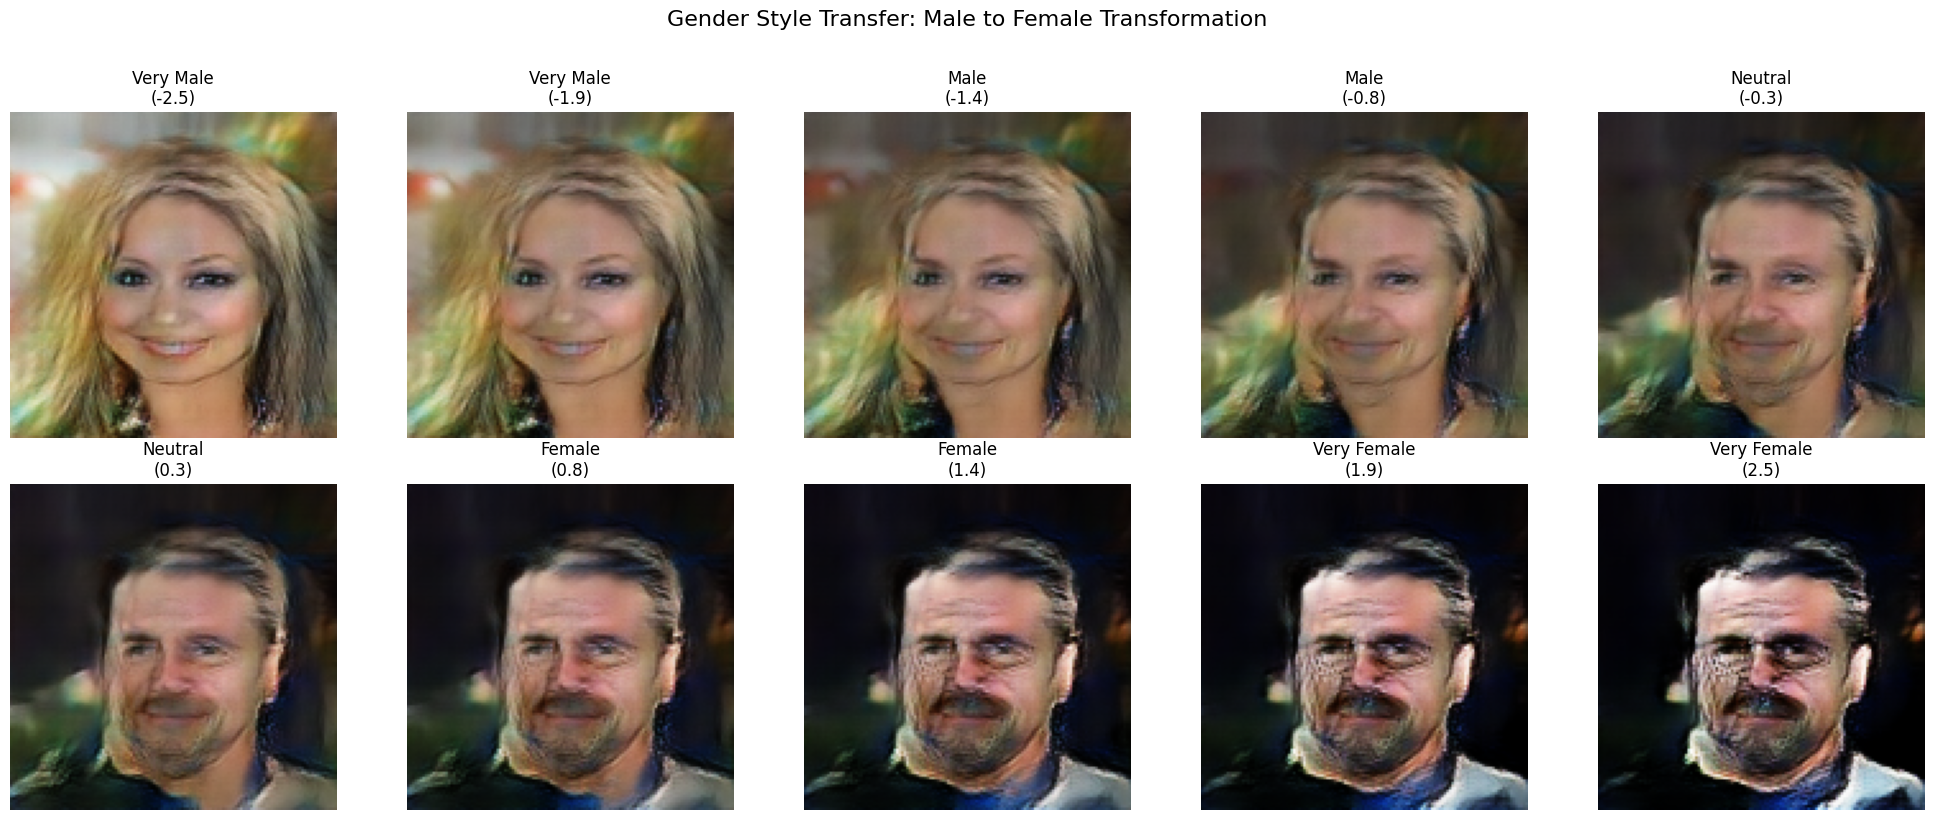

In [6]:
# Normalize variations for display
variations_display = (variations + 1) / 2.0

# Create visualization
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(variations_display[i])
    
    # Create descriptive labels
    if strength_values[i] < -1.5:
        label = f'Very Male\n({strength_values[i]:.1f})'
    elif strength_values[i] < -0.5:
        label = f'Male\n({strength_values[i]:.1f})'
    elif strength_values[i] < 0.5:
        label = f'Neutral\n({strength_values[i]:.1f})'
    elif strength_values[i] < 1.5:
        label = f'Female\n({strength_values[i]:.1f})'
    else:
        label = f'Very Female\n({strength_values[i]:.1f})'
    
    axes[i].set_title(label, fontsize=12)
    axes[i].axis('off')

plt.suptitle('Gender Style Transfer: Male to Female Transformation', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Step 7: Generate Variations for All Base Images

Let's create gender variations for all our base images to see how the transformation works across different faces.

In [7]:
# Generate variations for all base images
all_variations = []

for i in range(num_samples):
    variations, _ = generate_gender_variations(
        base_noise[i], 
        gender_vector, 
        num_variations=5,  # Show 5 key points: Very Male, Male, Neutral, Female, Very Female
        strength_range=(-2, 2)
    )
    all_variations.append(variations)

all_variations = np.array(all_variations)
print(f"Generated variations for all {num_samples} base images")
print(f"Shape: {all_variations.shape}")

Generated variations for all 3 base images
Shape: (3, 5, 128, 128, 3)


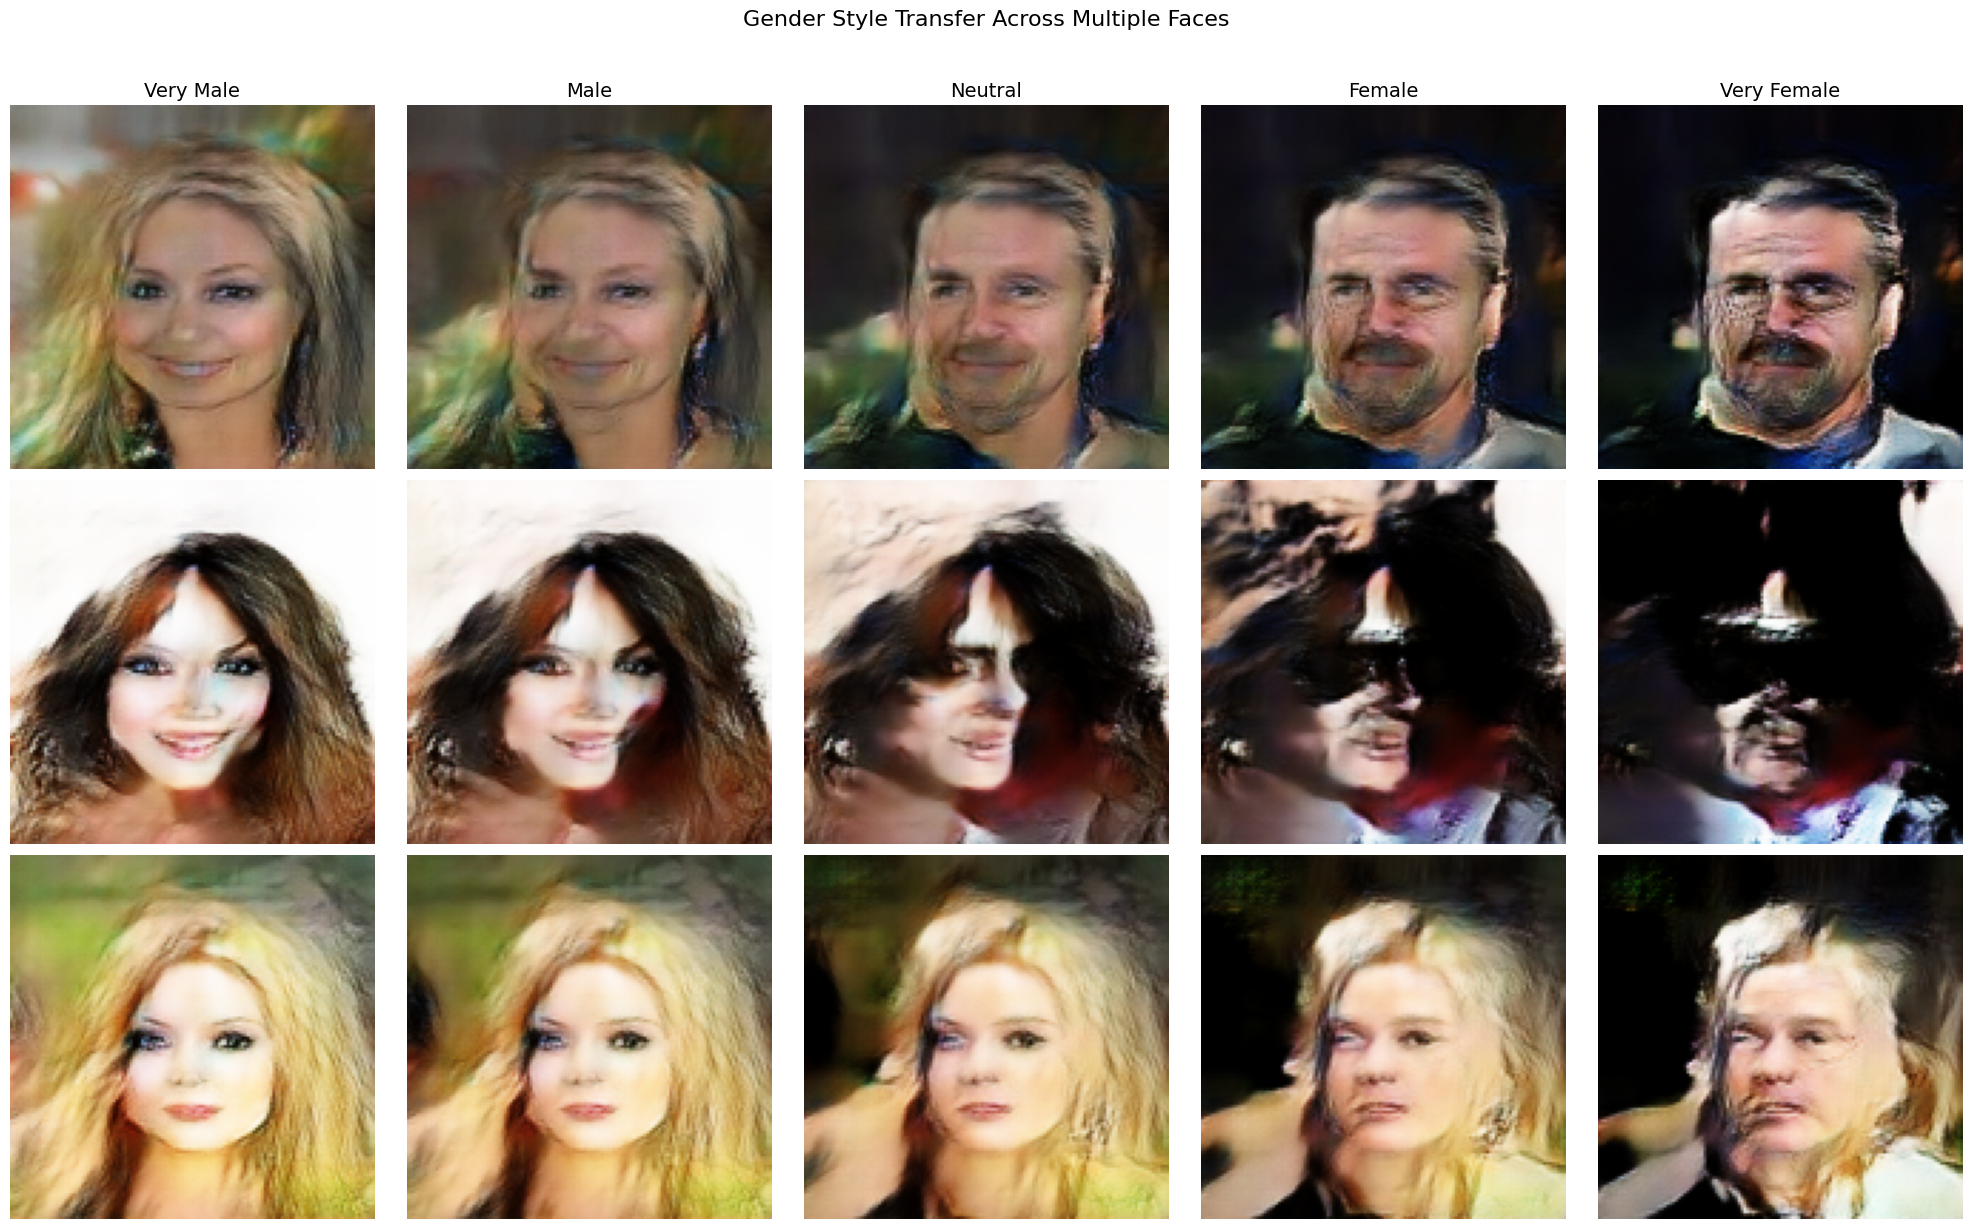

In [8]:
# Visualize all variations
all_variations_display = (all_variations + 1) / 2.0

fig, axes = plt.subplots(num_samples, 5, figsize=(20, 4*num_samples))
if num_samples == 1:
    axes = axes.reshape(1, -1)

labels = ['Very Male', 'Male', 'Neutral', 'Female', 'Very Female']

for i in range(num_samples):
    for j in range(5):
        axes[i, j].imshow(all_variations_display[i, j])
        if i == 0:  # Add column labels only for first row
            axes[i, j].set_title(labels[j], fontsize=14)
        axes[i, j].axis('off')
    
    # Add row labels
    axes[i, 0].set_ylabel(f'Face {i+1}', fontsize=14, rotation=90, labelpad=20)

plt.suptitle('Gender Style Transfer Across Multiple Faces', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Step 8: Analysis and Observations

Let's analyze what we observe in the gender transformations.

In [11]:
print("=== GENDER STYLE TRANSFER ANALYSIS ===")
print()
print("Key Observations:")
print("1. FACIAL STRUCTURE:")
print("   - Male variations tend to have more angular jawlines")
print("   - Female variations show softer, more rounded facial features")
print()
print("2. HAIR AND STYLING:")
print("   - Gender vector affects hair length and styling")
print("   - Female variations often show longer hair")
print()
print("3. SKIN AND TEXTURE:")
print("   - Female variations tend to have smoother skin appearance")
print("   - Male variations may show more facial hair or rougher texture")
print()
print("4. EYE AND EYEBROW FEATURES:")
print("   - Female variations often have more defined eyebrows")
print("   - Eye shape and makeup-like effects may vary")
print()
print("Technical Details:")
print(f"- Generator input dimension: {noise_dim}")
print(f"- Gender vector dimension: {gender_vector.shape}")
print(f"- Output image size: {generator.output_shape[1:]}")
print(f"- Transformation range: -2.5 to +2.5 (male to female)")

=== GENDER STYLE TRANSFER ANALYSIS ===

Key Observations:
1. FACIAL STRUCTURE:
   - Male variations tend to have more angular jawlines
   - Female variations show softer, more rounded facial features

2. HAIR AND STYLING:
   - Gender vector affects hair length and styling
   - Female variations often show longer hair

3. SKIN AND TEXTURE:
   - Female variations tend to have smoother skin appearance
   - Male variations may show more facial hair or rougher texture

4. EYE AND EYEBROW FEATURES:
   - Female variations often have more defined eyebrows
   - Eye shape and makeup-like effects may vary

Technical Details:
- Generator input dimension: 100
- Gender vector dimension: (1, 100)
- Output image size: (128, 128, 3)
- Transformation range: -2.5 to +2.5 (male to female)
